<a href="https://colab.research.google.com/github/fateme-alk/learning/blob/main/salary_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!pwd

/content


In [ ]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Jun  7 08:29 .
drwxr-xr-x 1 root root 4096 Jun  7 08:28 ..
drwxr-xr-x 4 root root 4096 Jun  5 13:38 .config
drwx------ 6 root root 4096 Jun  7 08:29 drive
drwxr-xr-x 1 root root 4096 Jun  5 13:38 sample_data


In [ ]:
import os
os.chdir('drive/MyDrive/extra/salary_and_state')

In [ ]:
url = 'before_cleaning.csv'

In [ ]:
# do not consider any data column in CSV file as index column, but it will assign default index column to pandas dataframe
df = pd.read_csv(url, index_col=False)

In [ ]:
# sets the 'Salary' column as the index of the resulting DataFrame and the result
# This column will no longer be considered part of the "data" columns which the result of df.columns will be Index(['Row no', 'State', 'Yrs of Experience'], dtype='object'). Salary column is not in data columns anympore
# df = pd.read_csv(url, index_col='Salary')

# use column at index 0 as the index of the resulting DataFrame.
# This column will no longer be considered part of the "data" columns which the result of df.columns will be Index(['State', 'Salary', 'Yrs of Experience'], dtype='object'). Row no column is not in data columns anympore
# df = pd.read_csv(url, index_col=0)

In [ ]:
# shows the data columns, the column which considered as index column will not show in this line of code
df.columns

Index(['Row no', 'State', 'Salary', 'Yrs of Experience'], dtype='object')

In [ ]:
df

,Row no,State,Salary,Yrs of Experience
0,1,NY,57400.0,Mid
1,2,TX,NaN,Entry
2,3,NJ,90000.0,High
3,4,VT,36900.0,Entry
4,5,TX,NaN,Mid
5,6,CA,76600.0,High
6,7,NY,85000.0,High
7,8,CA,NaN,Entry
8,9,CT,45000.0,Entry


In [ ]:
# drop column name Row no
df.drop('Row no', axis=1, inplace=True)

In [ ]:
df

,State,Salary,Yrs of Experience
0,NY,57400.0,Mid
1,TX,NaN,Entry
2,NJ,90000.0,High
3,VT,36900.0,Entry
4,TX,NaN,Mid
5,CA,76600.0,High
6,NY,85000.0,High
7,CA,NaN,Entry
8,CT,45000.0,Entry


In [ ]:
# your row indices are likely integers (0, 1, 2, ...)
# below line of code, remove row which has index number 0
# df.drop(5, axis=0, inplace=True)

# drop=True prevents the old index from being added as a new column
# df.reset_index(inplace=True, drop=True)

In [ ]:
df.replace('', np.nan, inplace=True)

In [ ]:
df

,State,Salary,Yrs of Experience
0,NY,57400.0,Mid
1,TX,NaN,Entry
2,NJ,90000.0,High
3,VT,36900.0,Entry
4,TX,NaN,Mid
5,CA,76600.0,High
6,NY,85000.0,High
7,CA,NaN,Entry
8,CT,45000.0,Entry


In [ ]:
df.shape

(9, 3)

In [ ]:
missing_df = df.isnull()

In [ ]:
missing_df

,State,Salary,Yrs of Experience
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,True,False
5,False,False,False
6,False,False,False
7,False,True,False
8,False,False,False


In [ ]:
def find_missing_columns(missing_df):
  missed_columns = []
  for column in missing_df.columns:
    if True in missing_df[column].unique():
      missed_columns.append(column)
  return missed_columns

In [ ]:
missing_columns = find_missing_columns(missing_df)

In [ ]:
missing_columns

['Salary']

In [ ]:
def show_missing_columns_info(missing_columns, missing_df, df):
  for column in missing_columns:
    print(missing_df[column].value_counts().to_dict())
    print(df[column].values)

In [ ]:
show_missing_columns_info(missing_columns, missing_df, df)

{False: 6, True: 3}
[57400.    nan 90000. 36900.    nan 76600. 85000.    nan 45000.]


In [ ]:
df['Salary'][0]

np.float64(57400.0)

In [ ]:
df

,State,Salary,Yrs of Experience
0,NY,57400.0,Mid
1,TX,NaN,Entry
2,NJ,90000.0,High
3,VT,36900.0,Entry
4,TX,NaN,Mid
5,CA,76600.0,High
6,NY,85000.0,High
7,CA,NaN,Entry
8,CT,45000.0,Entry


In [ ]:
df.columns

Index(['State', 'Salary', 'Yrs of Experience'], dtype='object')

In [ ]:
df.groupby(['Yrs of Experience', 'State']).mean()

Salary
Yrs of Experience State         
Entry             CA         NaN
                  CT     45000.0
                  TX         NaN
                  VT     36900.0
High              CA     76600.0
                  NJ     90000.0
                  NY     85000.0
Mid               NY     57400.0
                  TX         NaN

In [ ]:
df.groupby(['Yrs of Experience', 'State'])['Salary'].mean()

Yrs of Experience  State
Entry              CA           NaN
                   CT       45000.0
                   TX           NaN
                   VT       36900.0
High               CA       76600.0
                   NJ       90000.0
                   NY       85000.0
Mid                NY       57400.0
                   TX           NaN
Name: Salary, dtype: float64

In [ ]:
se_grp = df.groupby('Yrs of Experience')['Salary'].mean()

In [ ]:
se_grp

,Salary
Yrs of Experience,
Entry,40950.000000
High,83866.666667
Mid,57400.000000


In [ ]:
mean_salary_by_level = se_grp.to_dict()

In [ ]:
mean_salary_by_level

{'Entry': 40950.0, 'High': 83866.66666666667, 'Mid': 57400.0}

In [ ]:
df['Salary'].fillna(df['Yrs of Experience'].map(mean_salary_by_level), inplace=True)

<ipython-input-33-b9a647da74d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Yrs of Experience'].map(mean_salary_by_level), inplace=True)


In [ ]:
df

,State,Salary,Yrs of Experience
0,NY,57400.0,Mid
1,TX,40950.0,Entry
2,NJ,90000.0,High
3,VT,36900.0,Entry
4,TX,57400.0,Mid
5,CA,76600.0,High
6,NY,85000.0,High
7,CA,40950.0,Entry
8,CT,45000.0,Entry


In [ ]:
df.rename(columns={'Yrs of Experience': 'Level'}, inplace=True)

In [ ]:
df.columns

Index(['State', 'Salary', 'Level'], dtype='object')

In [ ]:
# before salary transformation
df['Salary']

,Salary
0,57400.0
1,40950.0
2,90000.0
3,36900.0
4,57400.0
5,76600.0
6,85000.0
7,40950.0
8,45000.0


In [ ]:
# def salary_transformation(se_val):
#   return se_val + 1

# df['Salary'] = df['Salary'].map(salary_transformation)

df['Salary'] = df['Salary'].map(lambda se_val: se_val + 1)

In [ ]:
# after salary transformation
df['Salary']

,Salary
0,57401.0
1,40951.0
2,90001.0
3,36901.0
4,57401.0
5,76601.0
6,85001.0
7,40951.0
8,45001.0


In [ ]:
states_formatting = {
    'NY': 'N.Y',
    'TX': 'T.X',
    'NJ': 'N.J',
    'VT': 'V.T',
    'CA': 'C.A',
    'CT': 'C.T',
}

In [ ]:
df['State'] = df['State'].map(states_formatting)

In [ ]:
df['State']

,State
0,N.Y
1,T.X
2,N.J
3,V.T
4,T.X
5,C.A
6,N.Y
7,C.A
8,C.T


In [ ]:
df

,State,Salary,Level
0,N.Y,57401.0,Mid
1,T.X,40951.0,Entry
2,N.J,90001.0,High
3,V.T,36901.0,Entry
4,T.X,57401.0,Mid
5,C.A,76601.0,High
6,N.Y,85001.0,High
7,C.A,40951.0,Entry
8,C.T,45001.0,Entry


In [ ]:
df['Salary'] = df['Salary'] / df['Salary'].max()

In [ ]:
df

,State,Salary,Level
0,N.Y,0.637782,Mid
1,T.X,0.455006,Entry
2,N.J,1.000000,High
3,V.T,0.410007,Entry
4,T.X,0.637782,Mid
5,C.A,0.851113,High
6,N.Y,0.944445,High
7,C.A,0.455006,Entry
8,C.T,0.500006,Entry


In [ ]:
def bin_feature(feature, num_bins, labels):
  min = df[feature].min()
  max = df[feature].max()
  bins = np.linspace(min, max, num_bins)

  feature_binned = f'{feature}-binned'
  df[feature_binned] = pd.cut(df[feature], bins=bins, labels=labels, include_lowest=True)
  return df[[feature, feature_binned]]

In [ ]:
bin_feature('Salary', 4, ['Low', 'Medium', 'high'])

,Salary,Salary-binned
0,0.637782,Medium
1,0.455006,Low
2,1.000000,high
3,0.410007,Low
4,0.637782,Medium
5,0.851113,high
6,0.944445,high
7,0.455006,Low
8,0.500006,Low


In [ ]:
'Salary-binned' in df.columns

True

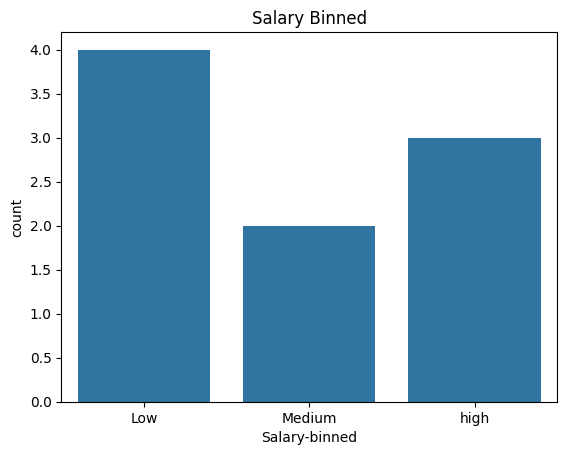

In [ ]:
sns.countplot(data=df, x='Salary-binned')

plt.title('Salary Binned')
plt.show()

In [ ]:
df

,State,Salary,Level,Salary-binned
0,N.Y,0.637782,Mid,Medium
1,T.X,0.455006,Entry,Low
2,N.J,1.000000,High,high
3,V.T,0.410007,Entry,Low
4,T.X,0.637782,Mid,Medium
5,C.A,0.851113,High,high
6,N.Y,0.944445,High,high
7,C.A,0.455006,Entry,Low
8,C.T,0.500006,Entry,Low


In [ ]:
# convert cat feature to num feature

## Visualization

In [ ]:
# state_salary = df.groupby('State').agg(
#     total_salary=('Salary', 'sum')
# ).to_dict()


In [ ]:
# state_salary

In [ ]:
state_salary = df.groupby('State')['Salary'].sum().to_dict()

Text(0.5, 1.0, 'State - Salary Normalized Sum')

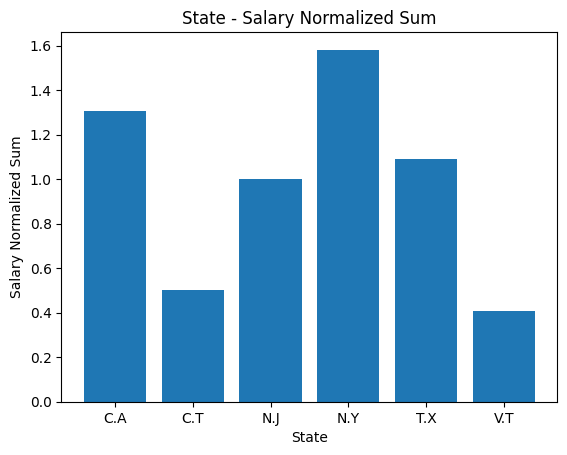

In [ ]:
plt.bar(state_salary.keys(), state_salary.values())
plt.xlabel('State')
plt.ylabel('Salary Normalized Sum')
plt.title('State - Salary Normalized Sum')

In [ ]:
level_salary = df.groupby('Level')['Salary'].sum().to_dict()

Text(0.5, 1.0, 'Level - Salary Normalized Sum')

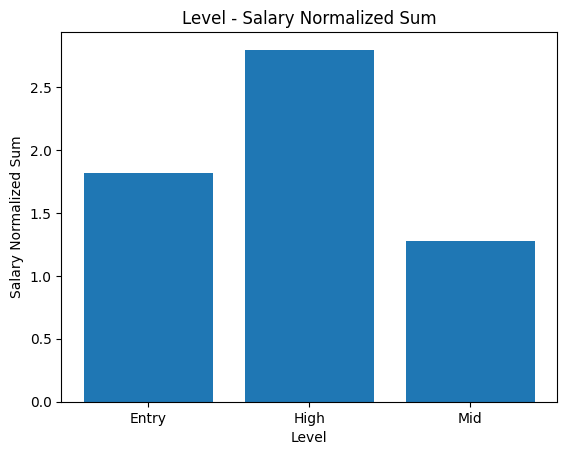

In [ ]:
plt.bar(level_salary.keys(), level_salary.values())
plt.xlabel('Level')
plt.ylabel('Salary Normalized Sum')
plt.title('Level - Salary Normalized Sum')

Text(0.5, 1.0, 'Level - Count')

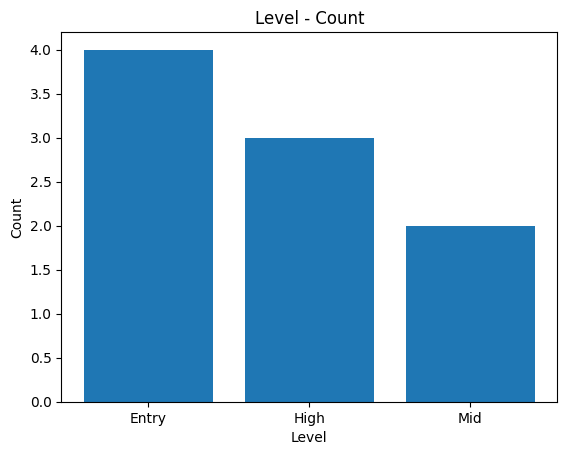

In [ ]:
# implement in matplotlib
level_count = df['Level'].value_counts()
plt.bar(level_count.index, level_count.values)

# we can use two below lines:
# level_count = df['Level'].value_counts().to_dict()
# plt.bar(level_count.keys(), level_count.values())

plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Level - Count')

<Axes: xlabel='Level', ylabel='count'>

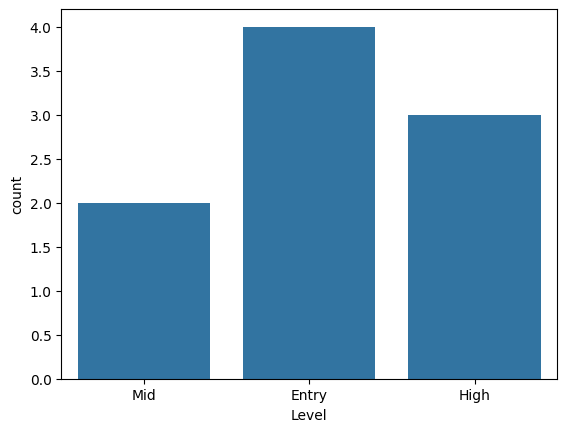

In [ ]:
# implement in seaborn
sns.countplot(data=df, x='Level')

<Axes: xlabel='Level'>

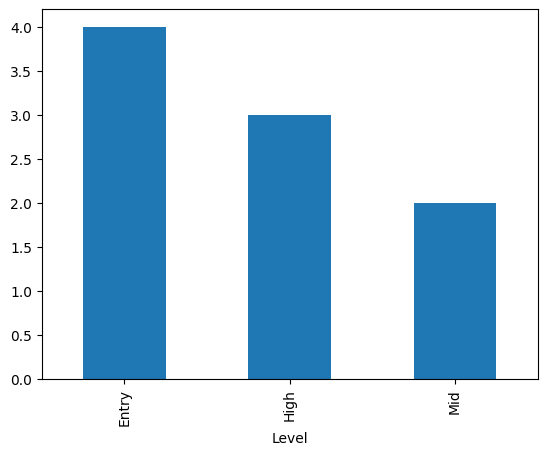

In [ ]:
# implement in pandas
df['Level'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'State - Count')

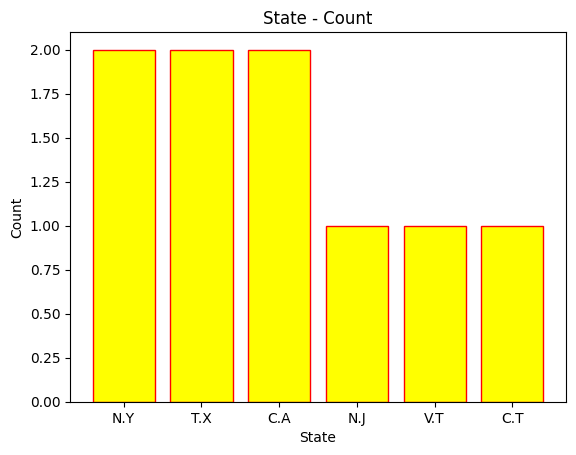

In [ ]:
# implement in matplotlib
state_count = df['State'].value_counts()
plt.bar(state_count.index, state_count.values, edgecolor='red', color='yellow')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State - Count')

Text(0.5, 1.0, 'Salary binned - Count')

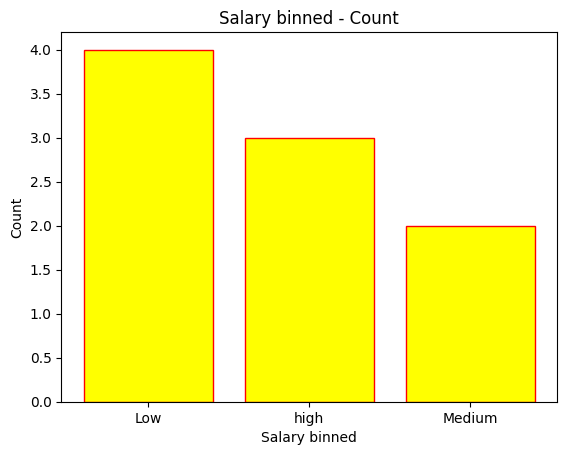

In [ ]:
# implement in matplotlib
salary_binned_count = df['Salary-binned'].value_counts()
plt.bar(salary_binned_count.index, salary_binned_count.values, edgecolor='red', color='yellow')
plt.xlabel('Salary binned')
plt.ylabel('Count')
plt.title('Salary binned - Count')

Text(0.5, 1.0, 'Distribution of Salary Among Samples')

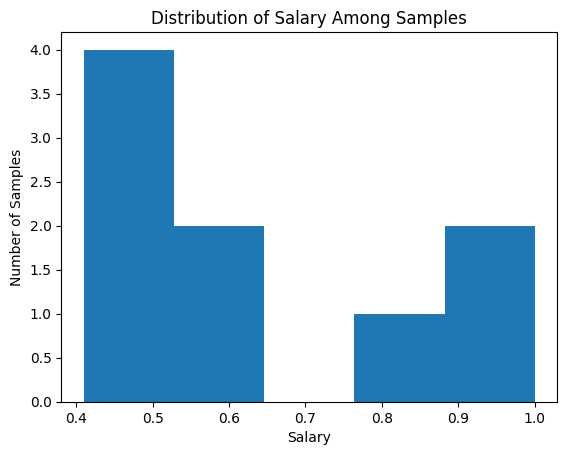

In [ ]:
plt.hist(df['Salary'], bins=5)
plt.xlabel('Salary')
plt.ylabel('Number of Samples')
plt.title('Distribution of Salary Among Samples')